In [ ]:
#import statsmodels.datasets.co2 as co2
#co2_data = co2.load(as_pandas=True).data
#print(co2_data)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import torch.nn.init as init

In [ ]:
#co2_data = co2_data.fillna(co2_data.interpolate())
#co2_data.plot()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving tbill_3mo.xlsx - 1.csv to tbill_3mo.xlsx - 1.csv


In [ ]:
import io
dataset =pd.read_csv(io.BytesIO(uploaded["tbill_3mo.xlsx - 1.csv"]))
df = pd.DataFrame(dataset)
df.head()

,obs_date,tbill_3m
0,1982-01-01,12.92
1,1982-02-01,14.28
2,1982-03-01,13.31
3,1982-04-01,13.34
4,1982-05-01,12.71


In [ ]:
import re
class TimeSeriesDataset(torch.utils.data.Dataset):
    
    def __init__(self,csv_file):
        
        self.csv_file=csv_file
        dataset =pd.read_csv(io.BytesIO(uploaded[csv_file]))
        time=dataset['obs_date'].str.split('-')
        
        arr_x=np.array([])
        
        idx=np.array([])
        for rows in range(len(dataset.to_numpy())):
            
            arr_x=np.append(arr_x,float(dataset.to_numpy()[rows][1])) #remove ''
            
            idx=np.append(idx,float(rows))
      
        self.x=torch.tensor(arr_x)
        
        self.idx=torch.tensor(idx)
       
    def __len__(self):
        return len(self.x) 
       
    def __getitem__(self,i):
        return self.idx[i],self.x[i]

03
405


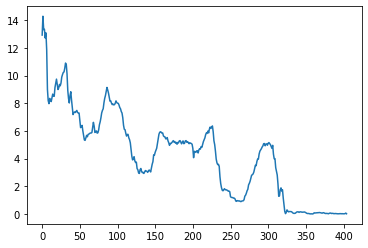

In [ ]:
import matplotlib.pyplot as plt
dataset= TimeSeriesDataset('tbill_3mo.xlsx - 1.csv')
print(len(dataset))
time = np.array([])
footfall=np.array([])
for i in range(len(dataset)):
  
    time=np.append(time,list(dataset)[i][0])
    footfall =np.append(footfall,list(dataset)[i][1])

plt.plot(time,footfall)


In [45]:
class Net(nn.Module):
     def __init__(self):
        super().__init__()
        self.input_size = 1# Input
        self.hidden1_size = 40
        self.hidden2_size = 30
        self.hidden3_size = 20
        self.hidden4_size = 20
        self.hidden5_size = 10
        self.output_size = 1

        #define layers
        self.func1 =nn.Sequential(nn.Linear(self.input_size, self.hidden1_size),
                                  nn.Linear(self.hidden1_size,self.hidden2_size),nn.ReLU(),
                                  nn.Linear(self.hidden2_size,self.hidden3_size),nn.ReLU(),
                                  nn.Linear(self.hidden3_size,self.hidden4_size),nn.ReLU(),
                                  nn.Linear(self.hidden4_size,self.hidden5_size),nn.ReLU(),
                                  nn.Linear(self.hidden5_size,self.hidden5_size),nn.ReLU(),
                                  nn.Linear(self.hidden5_size,self.output_size))
        
     def forward(self,idx):
         x_out=torch.t(self.func1(idx))
         return x_out

In [ ]:
BATCH_SIZE=20 
from torch.autograd import Variable
trainloader = torch.utils.data.DataLoader(dataset,batch_size=BATCH_SIZE)#,shuffle=True,num_workers=2)
net = Net()
loss_function = nn.MSELoss()
torch.manual_seed(44)
optimizer = optim.Adam(net.parameters(), lr=0.0005)#todo
for epoch in range(50000):
    running_loss_ = torch.tensor(0.0)
     
    optimizer.zero_grad()
    for i, data in enumerate(trainloader, 0):
        idx,input_x = data
        idx, input_x= idx.float(), input_x.float()
        idx=idx.reshape(-1,1)
        idx = Variable(idx)
        input_x = Variable(input_x)
    
        output_x=net(idx)
        
        loss_x = loss_function(output_x,input_x)
     
        running_loss_ = loss_x  
        
        running_loss_.backward()
        
        optimizer.step()#update the weights
        optimizer.zero_grad()
        
         # print statistics
        
        if i % 10*BATCH_SIZE == 0:    # print every 20 mini-batches
           print('[%d,%5d] loss: %.3f' %(epoch + 1, i + 1, (running_loss_)))
 #finished training 

In [47]:
time=[]
x_in=[]
#for i in range(32):
trainloader = torch.utils.data.DataLoader(dataset)
for i, data in enumerate(trainloader,0):
    idx, x = data

    #print(x,y)
    time.append(idx)
    x_in.append(x)
    

In [ ]:
import matplotlib.pyplot as plt

timeall=[]
o_x=[]
delta =0.2
for i in range(2000):
    tt=i*delta
    timeall.append(tt)
    out_x =net(torch.tensor(float(tt)).unsqueeze(dim=0))
    o_x.append(out_x)
    
plt.plot(time,x_in,'bo')

plt.plot(timeall,o_x,'-r')



plt.show()
plt.savefig('trainedlines_x_blue_y_red2.pdf')
#[w1,w2,w3,w4,w5,w6]=net.parameters()

